In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("data/metro.csv", encoding='euc-kr')

In [5]:
departure_station = input("출발역 이름을 입력하세요: ")
direction = input("상하구분을 입력하세요 (상/하): ")
day_of_week = input("요일을 입력하세요 (예: 월요일): ")
time_range = input("시간대를 입력하세요 (예: 12:00~18:00): ")
start_time, end_time = time_range.split('~')

start_time = start_time.replace(':', '시') + '분'
end_time = end_time.replace(':', '시') + '분'
direction = direction+"선"
weekday_dict = {
    '월요일': '평일', '화요일': '평일', '수요일': '평일',
    '목요일': '평일', '금요일': '평일', '토요일': '주말', '일요일': '주말'
}
day_type = weekday_dict[day_of_week]

filtered_df = df[(df['출발역'].str.contains(departure_station)) & 
                 (df['상하구분'] == direction) & 
                 (df['요일구분'] == day_type)]

In [6]:
time_columns = filtered_df.columns[6:]  # 시간 컬럼 추출
start_idx = time_columns.get_loc(start_time)
end_idx = time_columns.get_loc(end_time) + 1

relevant_times = time_columns[start_idx:end_idx]
relevant_data = filtered_df[relevant_times].astype(float)

In [7]:
mean_congestion = relevant_data.mean(axis=0)
min_congestion_time = mean_congestion.idxmin()

In [8]:
print(f"가장 혼잡도가 낮은 시간: {min_congestion_time}")

가장 혼잡도가 낮은 시간: 14시00분


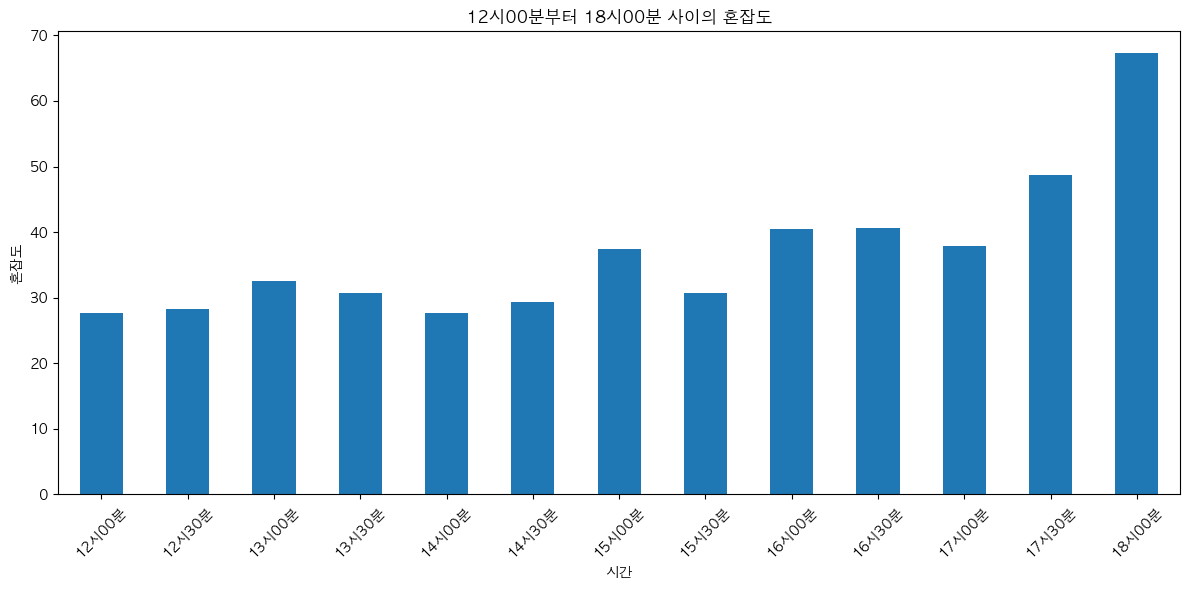

In [9]:
plt.rc('font', family='AppleGothic')
plt.figure(figsize=(12, 6))
mean_congestion.plot(kind='bar')
plt.xlabel('시간')
plt.ylabel('혼잡도')
plt.title(f'{start_time}부터 {end_time} 사이의 혼잡도')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()